In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Business Understanding

## A. Topic

How an e-commerce company can utilize customer's behavioral data to improve Customer Relationship Management (CRM)

## B. Problem Statement

Today CRM and Cohort Analysis is the must have knowledge for any Data Scientist or Data Analyst. The company uses CRM to improve customer service relationships and assist in customer retention and drive sales growth. Company would like to analyze and gather information about customer's behavior.

## C. Objectives

- Improve customer service relationships
- Assist in customer retention
- Drive sales growth

## D. Mission

- Analyze and gather information about customer's behavior
- Create Cluster based on customer's behavior
- Make or apply marketing strategy recommendation for customer

## E. About the Dataset

The dataset contains the information about customer's purchases across the United States. There are about 9800 observations and their purchases during the year period from 2015 to 2018.

### a. Features Description

Row ID:ID number row
Order ID:ID Order
Order Date:Order Date
Ship Date:Ship Date
Ship mode:Ship mode
Customer ID:Customer ID
Customer Name:Customer Name
Segment:Segment
Country:Country
City:City
Product Name:Product Name
Sales:Sales
Sub-Category: Sub-Category
Category:Category
Product ID:Product ID
Region:Region
Postal Code:Postal Code
State:State

### b. Dataset Source

dataset: [customer_segmentation.csv](https://drive.google.com/file/d/1CYLEq-I6UNDzUEGpUgGH0vx4Bfa9wVb_/view)

## G. Add Information

Terminology:

- Cohort - group of people (users, individuals and etc.) who have a common characteristic(-s) during a period of time.
- Cohort Analysis - a subset of behavioral analytics that researches groups of people who have taken a common action during a selected period of time.
- Retention - the continued possession, use, or control something.

Type of cohorts as: 

- Time Cohorts (So called Retention)
- Behavior Cohorts (RFM, LFL and other variations of analysis)
- Size Cohorts (Clustering, Behavior Patterns Segmentation and etc.)



# Import Library

In [ ]:
!pip install yellowbrick
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.3 MB/s eta 0:00:00


In [ ]:
# Basic Understanding
import pandas as pd
import numpy as np
import io

# Warning ignore
import warnings

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Import Data

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# EDA

## A. Read Data

In [ ]:
# dataset = pd.read_csv('https://drive.google.com/file/d/1CYLEq-I6UNDzUEGpUgGH0vx4Bfa9wVb_/view')
# dataset = pd.read_csv(io.BytesIO(uploaded['customer-segmentation.csv']))
# dataset = pd.read_csv('customer-segmentation.csv')
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer-segmentation.csv")
df_copy = dataset.copy()

In [ ]:
df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### a. Rename Columns

In [ ]:
df_copy.columns = ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
                   'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 
                   'postal_code', 'region', 'product_id', 'category', 
                   'sub_category', 'product_name', 'sales']

In [ ]:
# Copy after rename, untuk berjaga2 apabila file data awal dibutuhkan
df = df_copy.copy()

In [ ]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.shape

(9800, 18)

Catatan:
- dataset terdiri dari 9800 baris dan 18 fitur/kolom
- **'row_id'** sama seperti index sehingga tidak dibutuhkan dan harus didrop agar duplicate data dapat lebih terlihat. **NOTED**
- 'order_id' mungkin menggambarkan tahun order karena tidak ada keterangan lebih lanjut. sehingga untuk sekarang dibiarkan
- 'order_date' dan ' ship_date' isinya berupa tanggal. perlu dicek tipe datanya. **NOTED**
- 'customer_id' dan 'customer_name' perlu dicek apakah nama yang sama memiliki id yang sama atau terdapat kesalahan. **NOTED**
- dipilih salah satu antara 'customer_id' dengan 'customer_name'. **NOTED**
- dari semua tipe data string atau object perlu dicek apakah ada kata yang sama tapi tulisannya labil. **NOTED**
- **'postal_code'** tidak dibutuhkan karena sudah terdapat fitur demografi lain yang lebih spesifik sehingga lebih baik didrop. **NOTED**
- 'product_id' merupakan kode terkait barang. dengan kata lain, menggambarkan kolom category, sub category dan product name. sehingga lebih baik didrop. **NOTED**
- 'product_name' merupakan fitur nama produk yang terlalu mendetail sehingga untuk customer segmentation/clustering terlalu banyak. oleh karena itu, lebih baik didrop. **NOTED**
- perlu visualisasi untuk melihat hubungan semua fitur pada sales dan customer
- pastikan sales > 0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state          9800 non-null   object 
 11  postal_code    9789 non-null   float64
 12  region         9800 non-null   object 
 13  product_id     9800 non-null   object 
 14  category       9800 non-null   object 
 15  sub_category   9800 non-null   object 
 16  product_name   9800 non-null   object 
 17  sales          9800 non-null   float64
dtypes: float

Catatan:

- dari info dataset terdapat 3 fitur numerik dan 15 fitur kategorikal
- fitur yang mengandung tanggal masih dalam tipe data object sehingga perlu diubah ke datetime. **NOTED**
- terlihat ada missing value pada fitur postal code, namun karena postal code tidak digunakan maka fitur akan dirop. **NOTED**



In [ ]:
df.describe(include=['O'])

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [ ]:
df.drop(columns=['row_id', 'postal_code']).describe()

,sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


Catatan:
- min sales = 0.444 
- mean sales = 54.489
- max sales = 22638.48

In [ ]:
df.nunique()

row_id           9800
order_id         4922
order_date       1230
ship_date        1326
ship_mode           4
customer_id       793
customer_name     793
segment             3
country             1
city              529
state              49
postal_code       626
region              4
product_id       1861
category            3
sub_category       17
product_name     1849
sales            5757
dtype: int64

Catatan:
- dari 9800 observasi ternyata hanya terdapat 793 customer.
- dari 9800 observasi ternyata terdapat 4922 transaksi. berarti dari 4922 transaksi dilakukan oleh 793 customer.



### b. Some Feature Engineering

In [ ]:
# Drop 'row_id' dan 'postal_code'
df.drop(columns=['row_id', 'postal_code'], inplace=True)

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name,sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## B. Missing Value

### Check

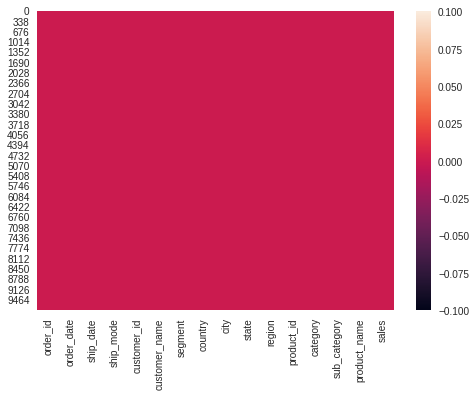

In [ ]:
sns.heatmap(df.isna());

In [ ]:
df.isna().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
dtype: int64

Catatan:
- Tidak ada missing value karena sebelumnya 'postal_code' telah didrop

## C. Duplicated Data

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated(keep=False)]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name,sales
3405,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3406,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [ ]:
df['order_id'].count()

9800

In [ ]:
df.drop_duplicates(inplace=True);

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['order_id'].count()

9799

## D. Visualization

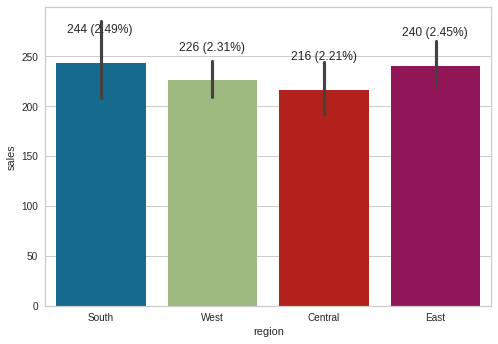

In [ ]:
# temp = df.groupby('region')['sales'].mean().reset_index()
ax = sns.barplot(data = df, x='region',y='sales')
for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(df)), \
                (p.get_x()+0.1, p.get_height()+30))
plt.show()

Catatan:
- dari visualisasi barplot region terhadap sales dan modus pada region, region west merupakan modus namun **rata-rata sales** pada region west tidak yang tertinggi (ketiga tertinggi) sehingga
- dapat diasumsikan bahwa region west banyak membeli produk-produk dengan harga rendah.

- Apa yang mempengaruhi penjualan di setiap region?
    a. banyak customer ?


([<matplotlib.patches.Wedge at 0x7f9191541dc0>,
 [Text(0.773132643738409, 0.7824742265314932, 'Central'),
  Text(-0.8320277939379772, 0.7195343981455669, 'East'),
  Text(-0.7849139174036318, -0.770655657389268, 'South'),
  Text(0.7169010581875779, -0.8342978321735777, 'West')],
 [Text(0.4217087147664048, 0.42680412356263264, '25.19%'),
  Text(-0.45383334214798754, 0.39247330807940006, '26.92%'),
  Text(-0.42813486403834455, -0.42035763130323706, '20.48%'),
  Text(0.3910369408295879, -0.4550715448219514, '27.40%')])

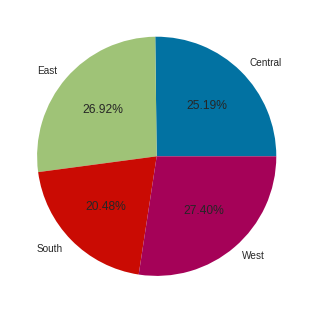

In [ ]:
temp = df.groupby('region')['customer_id'].nunique()
plt.pie(temp, labels=temp.index, autopct='%.2f%%')

In [ ]:
df.groupby('region')['customer_id'].nunique().mean()

621.25

In [ ]:
df['sales'].mean()

230.76389536687415

- Dari segi banyak customer.
    a. south memiliki jumlah customer yang paling sedikit, namun memiliki penjualan yang paling banyak.
    b. west memiliki jumlah customer yang paling banyak, namun  memiliki penjualan yang lebih sedikit daripada south.
    c. central memiliki jumlah customer mendekati rata-rata, namun memiliki penjualan dibawah rata-rata
    d. east memiliki jumlah customer diatas rata-rata dan memiliki penjualan yang cukup tinggi.

Di asumsikan bahwa, 
a. customer south lebih sering membeli barang yang lebih mahal daripada west. 
b. Customer di west membeli barang yang cenderung lebih murah daripada customer south.
c. Customer central cenderung membeli barang murah.
d. Customer east cenderung membeli harga standard

Apa barang yang sering dibeli oleh customer south dan west ?

In [ ]:
df.groupby('region')['category', 'product_name'].describe()

category                               product_name         \
           count unique              top  freq        count unique   
region                                                               
Central     2277      3  Office Supplies  1399         2277   1283   
East        2784      3  Office Supplies  1667         2784   1402   
South       1598      3  Office Supplies   983         1598   1035   
West        3140      3  Office Supplies  1860         3140   1493   

                               
                     top freq  
region                         
Central  Staple envelope   13  
East     Staple envelope   17  
South            Staples    9  
West             Staples   13

In [ ]:
df[df['region'] == 'South']['category'].describe()

count                1598
unique                  3
top       Office Supplies
freq                  983
Name: category, dtype: object

In [ ]:
df[df['region'] == 'South']['product_name'].describe()

count        1598
unique       1035
top       Staples
freq            9
Name: product_name, dtype: object

In [ ]:
df[df['region'] == 'West']['category'].describe()

count                3140
unique                  3
top       Office Supplies
freq                 1860
Name: category, dtype: object

In [ ]:
df[df['region'] == 'West']['product_name'].describe()

count        3140
unique       1493
top       Staples
freq           13
Name: product_name, dtype: object

In [ ]:
df[df['region'] == 'South'][['product_name','sales']].max()

product_name    iOttie XL Car Mount
sales                      22638.48
dtype: object

In [ ]:
df[df['region'] == 'South'][['sales']].sum()

sales    389151.459
dtype: float64

In [ ]:
df[df['region'] == 'West'][['product_name','sales']].max()

product_name    netTALK DUO VoIP Telephone Service
sales                                     13999.96
dtype: object

In [ ]:
df[df['region'] == 'West'][['sales']].sum()

sales    710219.6845
dtype: float64

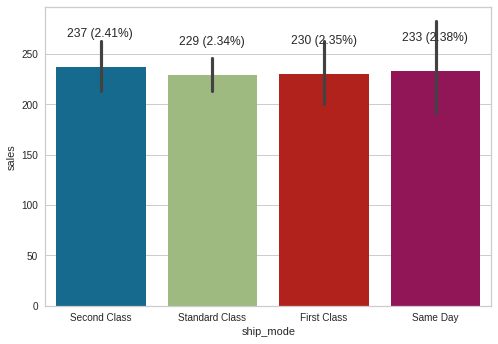

In [ ]:
# temp = df.groupby('ship_mode')['sales'].mean().reset_index()
ax = sns.barplot(data = df, x='ship_mode',y='sales')
for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(df)), \
                (p.get_x()+0.1, p.get_height()+30))
plt.show()

([<matplotlib.patches.Wedge at 0x7f919141a100>,
 [Text(0.7997222766369717, 0.7552776179992222, 'First Class'),
  Text(-0.31494093275500545, 1.0539507620735455, 'Same Day'),
  Text(-1.0954358021759087, 0.10010196457224689, 'Second Class'),
  Text(0.4032303554700173, -1.0234281999376036, 'Standard Class')],
 [Text(0.4362121508928936, 0.41196960981775754, '24.09%'),
  Text(-0.17178596332091203, 0.5748822338582975, '11.06%'),
  Text(-0.5975104375504956, 0.05460107158486193, '26.79%'),
  Text(0.21994383025637307, -0.5582335636023292, '38.05%')])

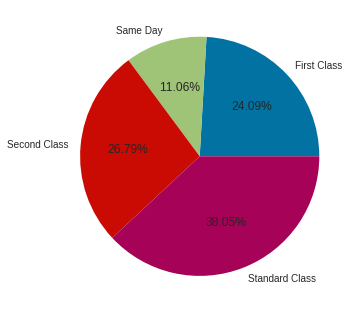

In [ ]:
temp = df.groupby('ship_mode')['customer_id'].nunique()
plt.pie(temp, labels=temp.index, autopct='%.2f%%')

Catatan:
- Dapat diasumikan bahwa Customer yang membeli produk dengan harga rata-rata cukup tinggi lebih memilih Same Day pada 'ship_mode'
- Dapat diasumsikan bahwa Customer yang membeli produk dengan harga rata-rata rendah lebih memilih standard class pada 'ship_mode'

### Some Feature Engineering

In [ ]:
# Data Conversion
df_viz = df.copy()
df_viz["order_date"] = pd.to_datetime(df_viz["order_date"])
df_viz["ship_date"] = pd.to_datetime(df_viz["ship_date"])

In [ ]:
## Extract Order Date
df_viz['year'] = df_viz['order_date'].dt.year.apply(str)
df_viz['month'] = df_viz['order_date'].dt.month.apply(int)
df_viz['year_month'] = df_viz['order_date'].dt.strftime('%Y-%m')
df_viz['month_date'] = df_viz['order_date'].dt.strftime('%m-%d')

In [ ]:
temp = df_viz.groupby('year_month')['sales'].sum().reset_index()
plt.figure(figsize=(15,5))
px.line(x= temp['year_month'],y = temp['sales'])
plt.show()

<Figure size 1080x360 with 0 Axes>

Catatan:
- pada bulan September tahun 2015 ke bulan Februari tahun 2016 terjadi penurunan sales yang cukup tinggi/drastis. Setelah dicek event pada bulan Desember 2015, Januari 2016, dan Februari tahun 2016 terdapat event ***xxx*** sehingga penjualan/sales mengalami penurunan.
- pada bulan Maret ke bulan April tahun 2018 terjadi penurunan sales yang cukup tinggi/drastis. Setelah dicek event pada bulan Maret dan April tahun 2018 terdapat event ***xxx*** sehingga penjualan/sales mengalami penurunan.
- Maka direkomendasikan....

# RFM (Recency, Frequency, Monetary)(Optional)

## A. Create RFM DataFrame (Optional)

In [ ]:
df_rfm = df_viz[['order_id', 'customer_id', 'order_date', 'sales']].copy()
df_rfm['order_date'] = pd.to_datetime(df_rfm['order_date'])
df_rfm

,order_id,customer_id,order_date,sales
0,CA-2017-152156,CG-12520,2017-08-11,261.9600
1,CA-2017-152156,CG-12520,2017-08-11,731.9400
2,CA-2017-138688,DV-13045,2017-12-06,14.6200
3,US-2016-108966,SO-20335,2016-11-10,957.5775
4,US-2016-108966,SO-20335,2016-11-10,22.3680
...,...,...,...,...
9795,CA-2017-125920,SH-19975,2017-05-21,3.7980
9796,CA-2016-128608,CS-12490,2016-12-01,10.3680
9797,CA-2016-128608,CS-12490,2016-12-01,235.1880
9798,CA-2016-128608,CS-12490,2016-12-01,26.3760


In [ ]:
df_customers = pd.DataFrame(df_rfm['customer_id'].unique())
df_customers.columns = ['customer_id']
df_customers.head()

,customer_id
0,CG-12520
1,DV-13045
2,SO-20335
3,BH-11710
4,AA-10480


In [ ]:
df_recency = df_rfm.groupby(by='customer_id')['order_date'].max().reset_index()
df_recency.columns = ['customer_id', 'recency_date']
recent_date = df_recency['recency_date'].max()
df_customers = df_customers.merge(df_recency, on='customer_id')
df_customers['recency'] = round((recent_date - df_customers['recency_date'])\
/ np.timedelta64(1, 'D')).astype(int)

In [ ]:
# df_recency = df_rfm.groupby('customer_id')['order_date'].max().reset_index()
# df_recency.columns = ['customer_id','recency_date']
# df_customers = df_customers.merge(df_recency, on='customer_id')
# df_customers['recency'] = round((pd.to_datetime('today') - df_customers['recency_date'])\
#                                 / np.timedelta64(1, 'D')).astype(int)

In [ ]:
df_frequency = df_rfm.groupby('customer_id')['order_id'].nunique().reset_index()
df_frequency.columns = ['customer_id','frequency']
df_customers = df_customers.merge(df_frequency, on='customer_id')

In [ ]:
df_monetary = df_rfm.groupby('customer_id')['sales'].sum().reset_index()
df_monetary.columns = ['customer_id','monetary']
df_customers = df_customers.merge(df_monetary, on='customer_id')

In [ ]:
df_customers.head()

,customer_id,recency_date,recency,frequency,monetary
0,CG-12520,2018-01-26,338,3,1148.7800
1,DV-13045,2018-11-12,48,5,1119.4830
2,SO-20335,2018-09-09,112,6,2602.5755
3,BH-11710,2018-07-12,171,8,6255.3510
4,AA-10480,2018-04-15,259,4,1790.5120


## B. Plot Statistical Distribution (Optional)

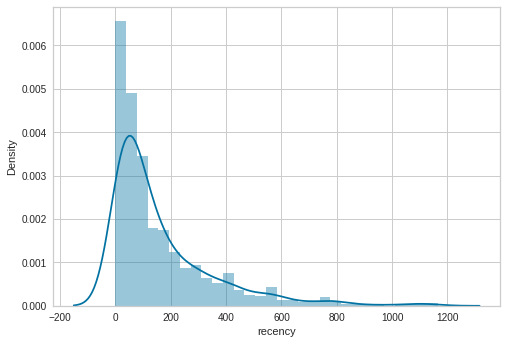

In [ ]:
sns.distplot(df_customers['recency'])

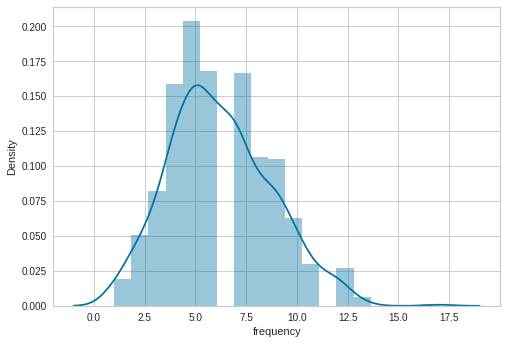

In [ ]:
sns.distplot(df_customers['frequency'])

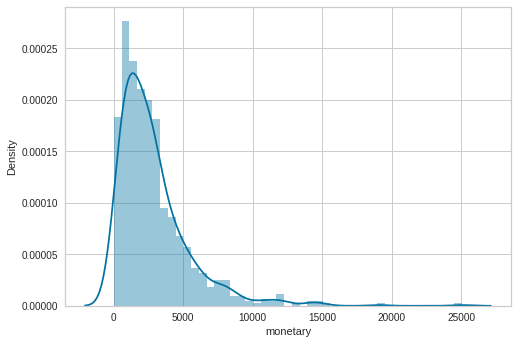

In [ ]:
sns.distplot(df_customers['monetary'])

- secara distribusi, terlihat recency dan monetary skew positive, sedangkan frekuensi skew sedikit rendah, sehingga nanti diperlukan stardardization atau log transformation untuk menghandle skew data.

In [ ]:
sc = StandardScaler()
rfm_sc = sc.fit_transform(df_customers[['recency', 'frequency', 'monetary']])
rfm_sc = pd.DataFrame(rfm_sc, columns=['recency', 'frequency', 'monetary'])

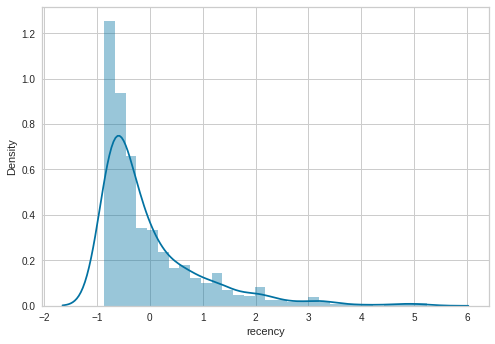

In [ ]:
sns.distplot(rfm_sc['recency'])

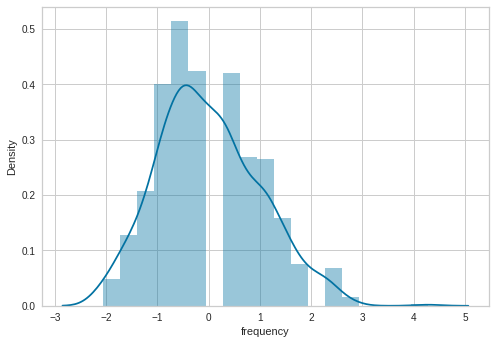

In [ ]:
sns.distplot(rfm_sc['frequency'])

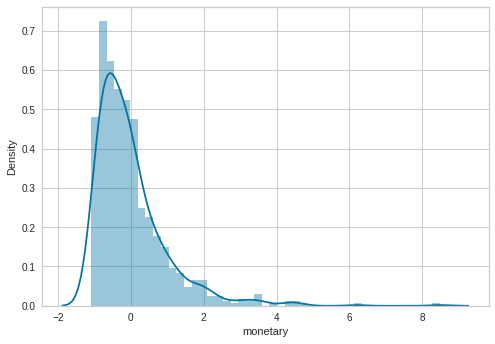

In [ ]:
sns.distplot(rfm_sc['monetary'])

## C. Calculate RFM Scores (Optional)

Using quantile-based discretization

In [ ]:
df_customers['r'] = pd.qcut(df_customers['recency'], q=5, labels=[5, 4, 3, 2, 1])
df_customers['f'] = pd.qcut(df_customers['frequency'].rank(method='first'), q=5, labels=[5, 4, 3, 2, 1])
df_customers['m'] = pd.qcut(df_customers['monetary'], q=5, labels=[5, 4, 3, 2, 1])

In [ ]:
df_customers.head()

,customer_id,recency_date,recency,frequency,monetary,r,f,m
0,CG-12520,2018-01-26,338,3,1148.7800,1,5,4
1,DV-13045,2018-11-12,48,5,1119.4830,4,4,4
2,SO-20335,2018-09-09,112,6,2602.5755,3,3,3
3,BH-11710,2018-07-12,171,8,6255.3510,2,2,1
4,AA-10480,2018-04-15,259,4,1790.5120,2,5,3


In [ ]:
df_customers.groupby('r').agg(
    count=('customer_id', 'count'),
    min_recency=('recency', min),
    max_recency=('recency', max),
    std_recency=('recency', 'std'),    
    avg_recency=('recency', 'mean')
).sort_values(by='avg_recency')

,count,min_recency,max_recency,std_recency,avg_recency
r,,,,,
5,160,0,32,8.966375,13.581250
4,162,33,69,10.549404,46.802469
3,154,70,128,16.354008,95.616883
2,158,130,277,40.647778,190.012658
1,159,278,1165,197.402866,479.031447


Dari hasil aggregasi by recency quantile:
- q5 memiliki recency paling baru antara 0-32 hari yang lalu
- q1 memiliki recency paling lama antara 278-1165 hari yang lalu
- dari keseluruhan banyak customer yang melakukan transaksi baru-baru ini. dapat diasumsikan perusahaan cukup bisa mengakuisisi customer retention. namun, butuh diimprove lagi karena cukup banyak pula customer yang sudah lama tidak melakukan transaksi.

In [ ]:
df_customers.groupby('f').agg(
    count=('customer_id', 'count'),
    min_frequency=('frequency', min),
    max_frequency=('frequency', max),
    std_frequency=('frequency', 'std'),    
    avg_frequency=('frequency', 'mean')
).sort_values(by='avg_frequency')

,count,min_frequency,max_frequency,std_frequency,avg_frequency
f,,,,,
5,159,1,4,0.951160,2.981132
4,158,4,5,0.464016,4.689873
3,159,5,7,0.543616,5.955975
2,158,7,8,0.495769,7.424051
1,159,8,17,1.290038,9.981132


Dari hasil aggregasi by frequency quantile:
- secara keseluruhan merata dari 1-17 transaksi.
- q1 memiliki sedikit customer yang melakukan transaksi hingga 17 kali. hal ini dilihat dari banyaknya customer, min freq, high freq, dan rata-rata frequency yang dekat dengan min freq.
- dapat diasumsikan bahwa customer jarang melakukan transaksi dilihat dari q5, q3, dan q1 dimana rata-rata frekuensi cenderung mendekati min freq.

In [ ]:
df_customers.groupby('m').agg(
    count=('customer_id', 'count'),
    min_monetary=('monetary', min),
    max_monetary=('monetary', max),
    std_monetary=('monetary', 'std'),    
    avg_monetary=('monetary', 'mean')
).sort_values(by='avg_monetary')

,count,min_monetary,max_monetary,std_monetary,avg_monetary
m,,,,,
5,159,4.833,933.704,280.046196,511.524475
4,158,937.039,1707.286,227.177631,1297.693241
3,159,1707.710,2697.248,275.435829,2209.927448
2,158,2716.412,4260.784,434.244062,3337.792584
1,159,4262.292,25043.050,3001.072843,6893.948393


Dari hasil aggregrasi by monetary quantile:
- q5 memiliki min mon lebih dari 0, sehingga dapat diasumsikan tidak ada customer yang mereturn/tidak jadi membeli produk.
- q1 memiliki anomali dimana max mon mencapai 25043.05 tetapi rata-rata hanya 6893. Sehingga dapat diasumsikan ada beberapa / sedikit customer yang melakukan transaksi dengan harga cukup tinggi atau jumlah barang yang banyak.
- secara keseluruhan terllihat bahwa terjadi skew positive

In [ ]:
df_customers['rfm'] = df_customers['r'].astype(str) +\
                      df_customers['f'].astype(str) +\
                      df_customers['m'].astype(str)

df_customers['rfm_score'] = df_customers['r'].astype(int) +\
                            df_customers['f'].astype(int) +\
                            df_customers['m'].astype(int)

In [ ]:
df_customers.head()

,customer_id,recency_date,recency,frequency,monetary,r,f,m,rfm,rfm_score
0,CG-12520,2018-01-26,338,3,1148.7800,1,5,4,154,10
1,DV-13045,2018-11-12,48,5,1119.4830,4,4,4,444,12
2,SO-20335,2018-09-09,112,6,2602.5755,3,3,3,333,9
3,BH-11710,2018-07-12,171,8,6255.3510,2,2,1,221,5
4,AA-10480,2018-04-15,259,4,1790.5120,2,5,3,253,10


In [ ]:
df_customers.groupby('rfm_score').agg(
    customers=('customer_id', 'count'),
    mean_recency=('recency', 'mean'),
    mean_frequency=('frequency', 'mean'),
    mean_monetary=('monetary', 'mean'),
).sort_values(by='rfm_score')

,customers,mean_recency,mean_frequency,mean_monetary
rfm_score,,,,
3,6,354.333333,10.500000,8787.693667
4,13,218.000000,9.384615,5569.481385
5,48,224.062500,8.395833,5384.860702
6,61,180.934426,8.278689,5321.625518
7,99,135.272727,8.131313,4288.095289
8,109,127.513761,7.045872,3523.493368
9,120,170.333333,6.241667,2434.485572
10,121,211.429752,5.256198,1979.496131
11,93,245.935484,4.193548,1135.826680


## D. Clustering Bases On RFM Scores (Optional)

In [ ]:
# kmeans atau kmedoids in another file
df_customers.to_csv("/content/customer_rfm.csv")

# Data Preprocessing

## A. Feature Engineering

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name,sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.describe(include=['O'])

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub_category,product_name
count,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5858,35,35,5101,9799,891,1946,3140,19,5909,1492,47


In [ ]:
df.groupby('customer_id')['customer_name'].nunique().reset_index().sort_values('customer_name',ascending=0)

,customer_id,customer_name
0,AA-10315,1
521,ML-17755,1
523,ML-18265,1
524,MM-17260,1
525,MM-17920,1
...,...,...
267,EM-13810,1
268,EM-13825,1
269,EM-13960,1
270,EM-14065,1


Catatan:
- 'product_name' merupakan fitur nama produk yang terlalu mendetail sehingga untuk customer segmentation/clustering terlalu banyak. oleh karena itu, lebih baik didrop. **NOTED**
- 'sub_category' tidak dibutuhkan untuk clustering saat ini karena memiliki banyak value untuk di cluster sehingga butuh didrop. **NOTED**
- 'city' tidak dibutuhkan untuk clustering saat ini karena memiliki banyak value untuk di cluster sehingga butuh didrop. **NOTED**
- 'state' tidak dibutuhkan untuk clustering saat ini karena memiliki banyak value untuk di cluster sehingga butuh didrop. **NOTED**
- dipertimbangkan mengambil 'customer_id' saja
- country di **drop**
- product name **drop**
- order id di **drop**
- date di **drop**, kecuali diextrax misal bulannya aja 
- order_to_ship: jarak hari dari order ke pengiriman

In [ ]:
df_fe = df.copy()
df_fe["order_date"] = pd.to_datetime(df_fe["order_date"])
df_fe["ship_date"] = pd.to_datetime(df_fe["ship_date"])

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9799 non-null   object        
 1   order_date     9799 non-null   datetime64[ns]
 2   ship_date      9799 non-null   datetime64[ns]
 3   ship_mode      9799 non-null   object        
 4   customer_id    9799 non-null   object        
 5   customer_name  9799 non-null   object        
 6   segment        9799 non-null   object        
 7   country        9799 non-null   object        
 8   city           9799 non-null   object        
 9   state          9799 non-null   object        
 10  region         9799 non-null   object        
 11  product_id     9799 non-null   object        
 12  category       9799 non-null   object        
 13  sub_category   9799 non-null   object        
 14  product_name   9799 non-null   object        
 15  sales          9799 n

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9799 non-null   object        
 1   order_date     9799 non-null   datetime64[ns]
 2   ship_date      9799 non-null   datetime64[ns]
 3   ship_mode      9799 non-null   object        
 4   customer_id    9799 non-null   object        
 5   customer_name  9799 non-null   object        
 6   segment        9799 non-null   object        
 7   country        9799 non-null   object        
 8   city           9799 non-null   object        
 9   state          9799 non-null   object        
 10  region         9799 non-null   object        
 11  product_id     9799 non-null   object        
 12  category       9799 non-null   object        
 13  sub_category   9799 non-null   object        
 14  product_name   9799 non-null   object        
 15  sales          9799 n

In [ ]:
df_fe.drop(columns=['order_id', 'order_date', 'ship_date', 'customer_id', 'product_id', \
'sub_category', 'city', 'state', 'customer_name', 'country',  'product_name'], inplace=True)

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ship_mode  9799 non-null   object 
 1   segment    9799 non-null   object 
 2   region     9799 non-null   object 
 3   category   9799 non-null   object 
 4   sales      9799 non-null   float64
dtypes: float64(1), object(4)
memory usage: 717.4+ KB


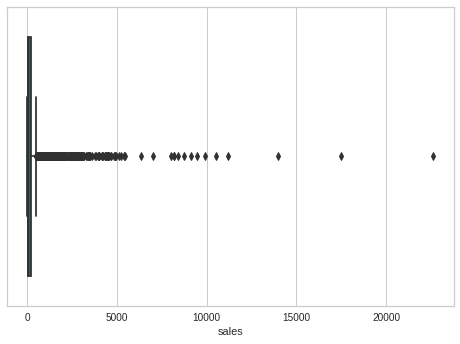

In [ ]:
sns.boxplot(df_fe['sales'])

In [ ]:
df_fe['sales'].describe().T

count     9799.000000
mean       230.763895
std        626.683644
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      22638.480000
Name: sales, dtype: float64

In [ ]:
iqr = df_fe['sales'].quantile(0.75) - df_fe['sales'].quantile(0.25)
upper = df_fe['sales'] >= (df_fe['sales'].quantile(0.75) + 1.5*iqr)
lower = df_fe['sales'] <= (df_fe['sales'].quantile(0.25) - 1.5*iqr)
df_fe.loc[upper, ['sales']].count()

sales    1145
dtype: int64

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ship_mode  9799 non-null   object 
 1   segment    9799 non-null   object 
 2   region     9799 non-null   object 
 3   category   9799 non-null   object 
 4   sales      9799 non-null   float64
dtypes: float64(1), object(4)
memory usage: 717.4+ KB


## B. Encoding

- region one hot
- category one hot
- segment one hot
- ship_mode label

In [ ]:
df_encode = df_fe.copy()
ohe = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()

# Label Encoding
le_temp = le.fit(df_encode['ship_mode'])
le_temp.classes_ = np.array(['Same Day', 'First Class', 'Second Class', 'Standard Class'])
df_encode['ship_mode'] = le_temp.transform(df_encode['ship_mode'])

# One Hot Encoding (ada error, dimana memunculkan missing value)
# ohe_temp = ohe.fit_transform(df_encode[['region', 'category', 'segment']])
# ohe_temp = pd.DataFrame(ohe_temp.toarray(), columns = ohe.get_feature_names_out())
# df_encode = pd.concat([df_encode, ohe_temp], axis=1)
# df_encode.drop(['region', 'category', 'segment'], axis=1, inplace=True)

# One Hot Encoding 2
ohe_temp = pd.get_dummies(df_encode[['region', 'category', 'segment']])
df_encode = df_encode.join(ohe_temp)
df_encode.drop(['region', 'category', 'segment'], axis=1, inplace=True)


df_encode

,ship_mode,sales,region_Central,region_East,region_South,region_West,category_Furniture,category_Office Supplies,category_Technology,segment_Consumer,segment_Corporate,segment_Home Office
0,2,261.9600,0,0,1,0,1,0,0,1,0,0
1,2,731.9400,0,0,1,0,1,0,0,1,0,0
2,2,14.6200,0,0,0,1,0,1,0,0,1,0
3,3,957.5775,0,0,1,0,1,0,0,1,0,0
4,3,22.3680,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9795,3,3.7980,1,0,0,0,0,1,0,0,1,0
9796,3,10.3680,0,1,0,0,0,1,0,0,1,0
9797,3,235.1880,0,1,0,0,0,0,1,0,1,0
9798,3,26.3760,0,1,0,0,0,0,1,0,1,0


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ship_mode                 9799 non-null   int64  
 1   sales                     9799 non-null   float64
 2   region_Central            9799 non-null   uint8  
 3   region_East               9799 non-null   uint8  
 4   region_South              9799 non-null   uint8  
 5   region_West               9799 non-null   uint8  
 6   category_Furniture        9799 non-null   uint8  
 7   category_Office Supplies  9799 non-null   uint8  
 8   category_Technology       9799 non-null   uint8  
 9   segment_Consumer          9799 non-null   uint8  
 10  segment_Corporate         9799 non-null   uint8  
 11  segment_Home Office       9799 non-null   uint8  
dtypes: float64(1), int64(1), uint8(10)
memory usage: 583.4 KB


In [ ]:
df_encode.isna().sum()

ship_mode                   0
sales                       0
region_Central              0
region_East                 0
region_South                0
region_West                 0
category_Furniture          0
category_Office Supplies    0
category_Technology         0
segment_Consumer            0
segment_Corporate           0
segment_Home Office         0
dtype: int64

### Correlation

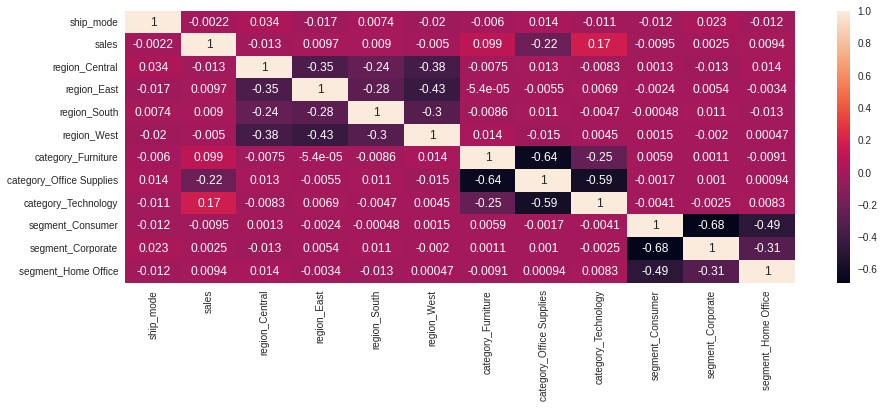

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df_encode.corr(), annot=True)
plt.show()

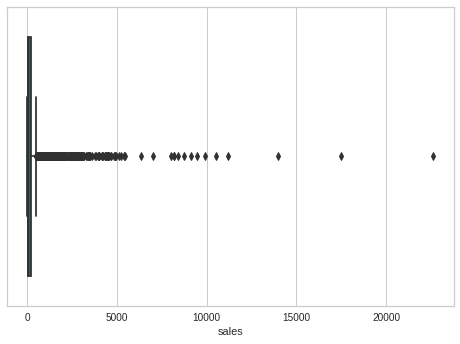

In [ ]:
sns.boxplot(df_encode['sales'])

In [ ]:
q1 = df_encode['sales'].quantile(0.25)
q3 = df_encode['sales'].quantile(0.75)
iqr = q3 - q1
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

# df_outlier = df_encode[(df_encode['sales'] >= upper) | (df_encode['sales'] <= lower)]
# df_outlier.info()

df_encode2 = df_encode[(df_encode['sales'] <= upper) & (df_encode['sales'] >= lower)]
df_encode2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8654 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ship_mode                 8654 non-null   int64  
 1   sales                     8654 non-null   float64
 2   region_Central            8654 non-null   uint8  
 3   region_East               8654 non-null   uint8  
 4   region_South              8654 non-null   uint8  
 5   region_West               8654 non-null   uint8  
 6   category_Furniture        8654 non-null   uint8  
 7   category_Office Supplies  8654 non-null   uint8  
 8   category_Technology       8654 non-null   uint8  
 9   segment_Consumer          8654 non-null   uint8  
 10  segment_Corporate         8654 non-null   uint8  
 11  segment_Home Office       8654 non-null   uint8  
dtypes: float64(1), int64(1), uint8(10)
memory usage: 287.3 KB


## C. Scaling

In [ ]:
# mms = MinMaxScaler()
# X_mms = mms.fit_transform(df_encode)
# X_mms = pd.DataFrame(X_mms, columns=df_encode.columns)

mms = MinMaxScaler()
X_mms = mms.fit_transform(df_encode2)
X_mms = pd.DataFrame(X_mms, columns=df_encode2.columns)

In [ ]:
# Reduce with PCA
# print('Number of features before PCA: {}'.format(len(X_mms[0])))
# pca = PCA()
# X_pca = pca.fit_transform(X_mms)
# print('Number of features after PCA: {}'.format(len(X_pca[0])))

In [ ]:
# pd.DataFrame(X_pca)

# Modeling

## A. K-Means

In [ ]:
X_mms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8654 entries, 0 to 8653
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ship_mode                 8654 non-null   float64
 1   sales                     8654 non-null   float64
 2   region_Central            8654 non-null   float64
 3   region_East               8654 non-null   float64
 4   region_South              8654 non-null   float64
 5   region_West               8654 non-null   float64
 6   category_Furniture        8654 non-null   float64
 7   category_Office Supplies  8654 non-null   float64
 8   category_Technology       8654 non-null   float64
 9   segment_Consumer          8654 non-null   float64
 10  segment_Corporate         8654 non-null   float64
 11  segment_Home Office       8654 non-null   float64
dtypes: float64(12)
memory usage: 811.4 KB


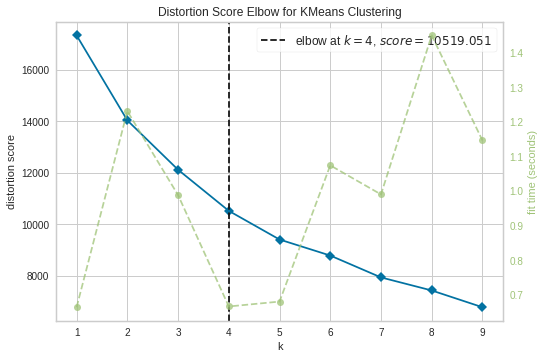

In [ ]:
# create a kmeans model
model = KMeans(random_state=42)

# use the KElbowVisualizer to calculate distortion for different numbers of clusters
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_mms)  
visualizer.show()

Silhouette Score cluster=3: 0.2694973264960649

Silhouette Score cluster=4: 0.26105034563482526

Silhouette Score cluster=5: 0.2882678269799616

Silhouette Score cluster=6: 0.27241586693362885



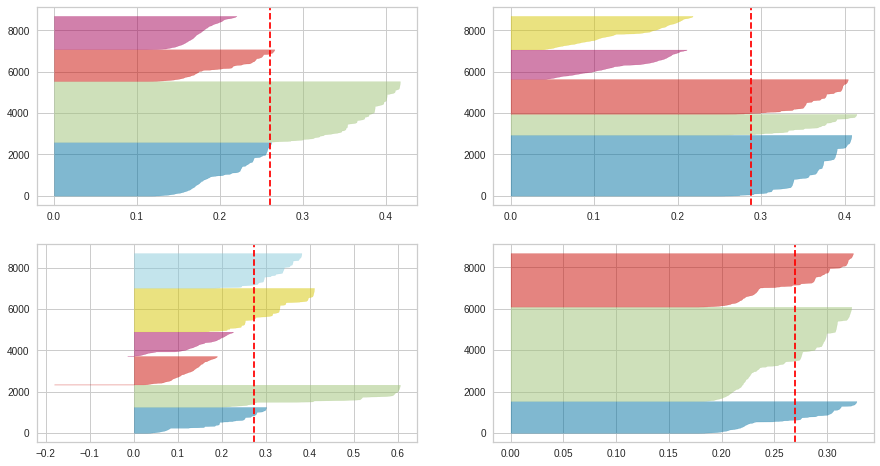

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [3, 4, 5, 6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(X_mms)
    print(f'Silhouette Score cluster={i}: {visualizer.silhouette_score_}\n')

### Predict / clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
y = kmeans.fit_predict(X_mms)

In [ ]:
y

array([4, 2, 0, ..., 3, 3, 3], dtype=int32)

## B. K-Medoids

In [ ]:
X_mms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8654 entries, 0 to 8653
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ship_mode                 8654 non-null   float64
 1   sales                     8654 non-null   float64
 2   region_Central            8654 non-null   float64
 3   region_East               8654 non-null   float64
 4   region_South              8654 non-null   float64
 5   region_West               8654 non-null   float64
 6   category_Furniture        8654 non-null   float64
 7   category_Office Supplies  8654 non-null   float64
 8   category_Technology       8654 non-null   float64
 9   segment_Consumer          8654 non-null   float64
 10  segment_Corporate         8654 non-null   float64
 11  segment_Home Office       8654 non-null   float64
dtypes: float64(12)
memory usage: 811.4 KB


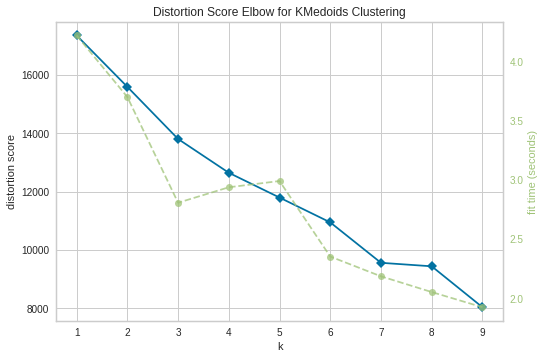

In [ ]:
kmedoids = KMedoids(init='k-medoids++', random_state=42)

# use the KElbowVisualizer to calculate distortion for different numbers of clusters
visualizer = KElbowVisualizer(kmedoids, k=(1,10))
visualizer.fit(X_mms)  
visualizer.show()

Silhouette Score cluster=4: 0.14119025951776737

Silhouette Score cluster=5: 0.14948076720579598

Silhouette Score cluster=6: 0.17661105481764344

Silhouette Score cluster=7: 0.22499528142221434

Silhouette Score cluster=8: 0.22801971197490492

Silhouette Score cluster=9: 0.2907087484993553



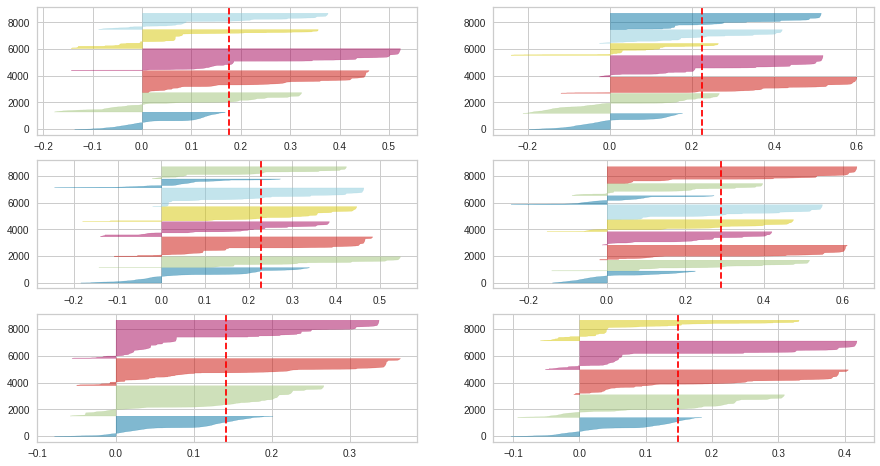

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [4, 5, 6, 7, 8, 9]:
    '''
    Create KMedoids instance for different number of clusters
    '''
    km = KMedoids(n_clusters=i, init='k-medoids++', random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMedoids instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-3][mod])
    visualizer.fit(X_mms)
    print(f'Silhouette Score cluster={i}: {visualizer.silhouette_score_}\n')

### Predict / clustering

In [ ]:
# kmedoids = KMedoids(n_clusters=4, random_state=42)
# y_med = kmedoids.fit_predict(X_mms)

In [ ]:
# y_med

**- dikarenakan kelbow tidak memiliki nilai k yang pasti dan silhoutte juga memiliki skor yang sangat rendah (init='k-medoids++), maka sulit mendapatkan cluster pasti menggunakan data awal sebagai clustering. sehingga digunakan RFM**

# Evaluation

In [ ]:
df_tes = df_fe[(df_fe['sales'] <= upper) & (df_fe['sales'] >= lower)].copy()
df_tes['cluster'] = y
df_tes

,ship_mode,segment,region,category,sales,cluster
0,Second Class,Consumer,South,Furniture,261.960,4
2,Second Class,Corporate,West,Office Supplies,14.620,2
4,Standard Class,Consumer,South,Office Supplies,22.368,0
5,Standard Class,Consumer,West,Furniture,48.860,4
6,Standard Class,Consumer,West,Office Supplies,7.280,0
...,...,...,...,...,...,...
9795,Standard Class,Corporate,Central,Office Supplies,3.798,2
9796,Standard Class,Corporate,East,Office Supplies,10.368,2
9797,Standard Class,Corporate,East,Technology,235.188,3
9798,Standard Class,Corporate,East,Technology,26.376,3


In [ ]:
# df_med = df_fe.copy()
# df_med['cluster'] = y_med
# df_med

In [ ]:
# df_med2 = df_fe.drop(columns=['order_to_ship']).copy()
# df_med2['cluster'] = y_med2
# df_med2

## A. K-Means

### Visualization / Interpretation

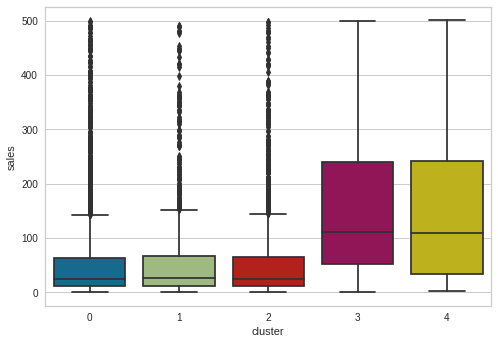

In [ ]:
sns.boxplot(data=df_tes, x='cluster', y='sales')

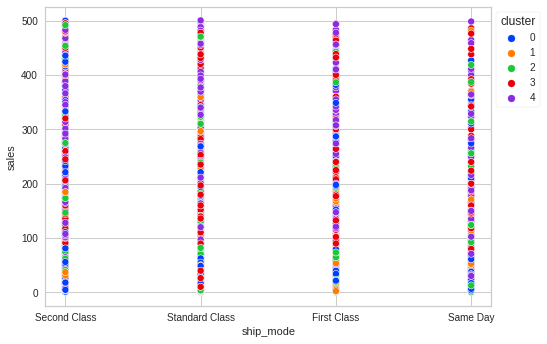

In [ ]:
ax =sns.scatterplot(data=df_tes, x='ship_mode', y='sales', hue=df_tes['cluster'], palette='bright')
plt.xlabel('ship_mode')
plt.ylabel('sales')
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1))
plt.show()

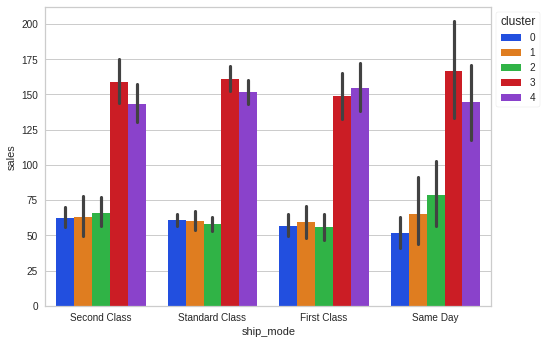

In [ ]:
ax =sns.barplot(data=df_tes, x='ship_mode', y='sales', hue='cluster', palette='bright')
plt.xlabel('ship_mode')
plt.ylabel('sales')
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1))
plt.show()

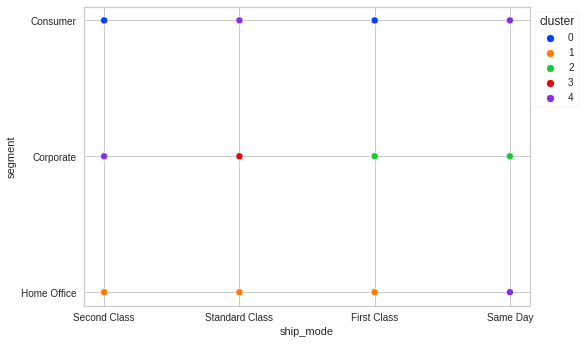

In [ ]:
ax = sns.scatterplot(data=df_tes, x='ship_mode', y='segment', hue=df_tes['cluster'], palette='bright')
plt.xlabel('ship_mode')
plt.ylabel('segment')
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1))
plt.show()

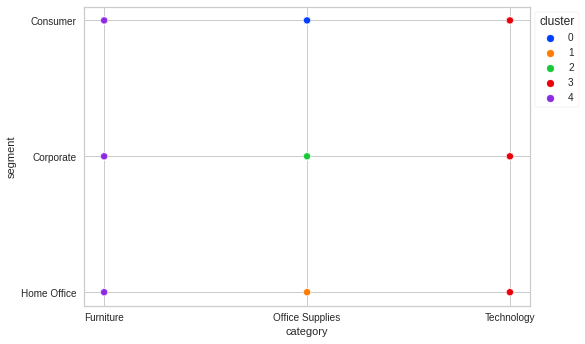

In [ ]:
ax = sns.scatterplot(data=df_tes, x='category', y='segment', hue=df_tes['cluster'], palette='bright')
plt.xlabel('category')
plt.ylabel('segment')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

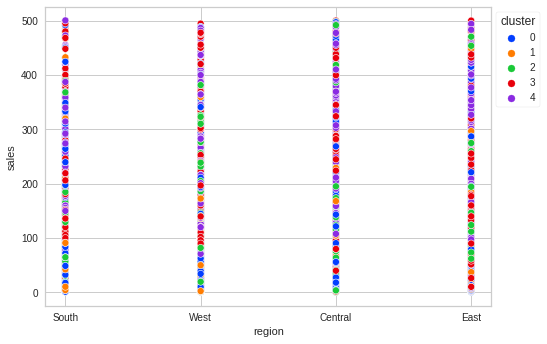

In [ ]:
ax = sns.scatterplot(data=df_tes, x='region', y='sales', hue=df_tes['cluster'], palette='bright')
plt.xlabel('region')
plt.ylabel('sales')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

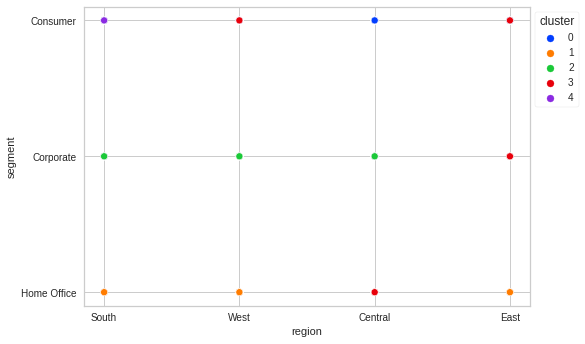

In [ ]:
ax = sns.scatterplot(data=df_tes, x='region', y='segment', hue=df_tes['cluster'], palette='bright')
plt.xlabel('region')
plt.ylabel('segment')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
df_tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8654 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ship_mode  8654 non-null   object 
 1   segment    8654 non-null   object 
 2   region     8654 non-null   object 
 3   category   8654 non-null   object 
 4   sales      8654 non-null   float64
 5   cluster    8654 non-null   int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 697.5+ KB


In [ ]:
# create a function to generate pie charts for a given categorical feature
def cluster_demographic(var):
    
    # Create subsets for each cluster
    df_0 = df_tes[df_tes['cluster']==0]
    df_1 = df_tes[df_tes['cluster']==1]
    df_2 = df_tes[df_tes['cluster']==2]
    df_3 = df_tes[df_tes['cluster']==3]
    df_4 = df_tes[df_tes['cluster']==4]

    fig, ax = plt.subplots(3, 2)
    plt.figure(figsize=(15,7))


    ax[0,0].pie(df_0[var].value_counts(), labels=df_0[var].value_counts().index, \
                    autopct="%.2f%%", textprops={'fontsize': 9})
    ax[0,0].title.set_text('Cluster 0')
    ax[0,1].pie(df_1[var].value_counts(), labels=df_1[var].value_counts().index, \
                    autopct="%.2f%%", textprops={'fontsize': 9})
    ax[0,1].title.set_text('Cluster 1')
    ax[1,0].pie(df_2[var].value_counts(), labels=df_2[var].value_counts().index, \
                    autopct="%.2f%%", textprops={'fontsize': 9})
    ax[1,0].title.set_text('Cluster 2')
    ax[1,1].pie(df_3[var].value_counts(), labels=df_3[var].value_counts().index, \
                    autopct="%.2f%%", textprops={'fontsize': 9})
    ax[1,1].title.set_text('Cluster 3')
    ax[2,0].pie(df_4[var].value_counts(), labels=df_4[var].value_counts().index, \
                    autopct="%.2f%%", textprops={'fontsize': 9})
    ax[2,0].title.set_text('Cluster 4')
    df_4.head()


    fig.delaxes(ax[2][1])
    plt.suptitle(var)

    plt.show()

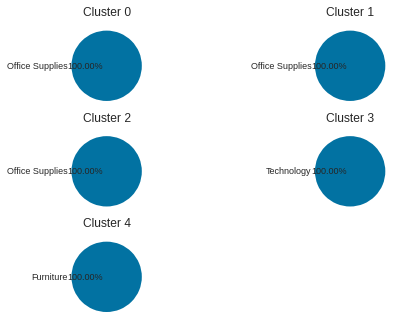

<Figure size 1080x504 with 0 Axes>

In [ ]:
cluster_demographic('category')

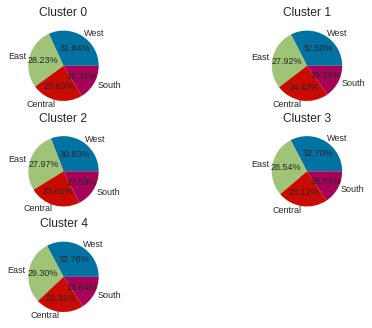

<Figure size 1080x504 with 0 Axes>

In [ ]:
cluster_demographic('region')

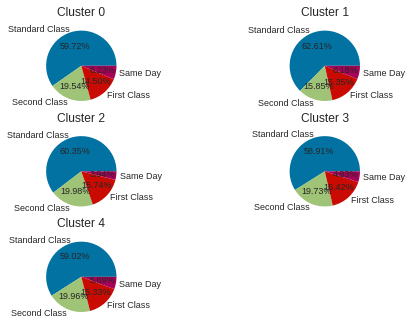

<Figure size 1080x504 with 0 Axes>

In [ ]:
cluster_demographic('ship_mode')

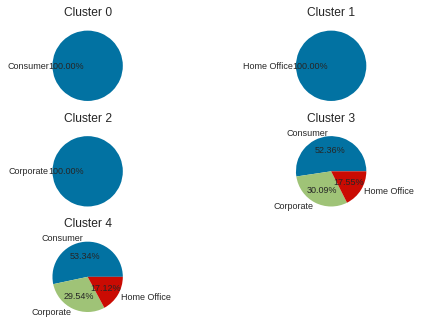

<Figure size 1080x504 with 0 Axes>

In [ ]:
cluster_demographic('segment')

## B. K-Medoids (Not Used)

### Visualization / Interpretation

# Conclusion

## A. Customer Segmentation
What a definition of a cluster group.

### a. K-Means

- **Cluster 0** : Mayoritas Consumer dari berbagai macam region yang membeli kategori office supplies dengan tingkat daya beli cukup rendah.
- **Cluster 1** : Mayoritas Home Office dari berbagai macam region yang membeli kategori office supplies dengan tingkat daya beli cukup rendah.
- **Cluster 2** : Mayoritas Corporate dari berbagai macam region yang membeli kategori Office Supplies dengan tingkat daya beli cukup rendah.
- **Cluster 3** : Berbagai jenis customer dari berbagai macam region yang membeli kategori Technology dengan tingkat daya beli cukup tinggi.
- **Cluster 4** : Berbagai jenis customer dari berbagai macam region yang membeli kategori furniture dengan tingkat daya beli cukup tinggi.

### b. K-Medoids (Not Used)

- **Cluster 0** : 
- **Cluster 1** : 
- **Cluster 2** : 
- **Cluster 3** : 
- **Cluster 4** : 

## B. Marketing Strategy Recommendation

### a. K-Means

- **Cluster 0**: Dapat direkomendasikan barang-barang terkait office supplies yang digunakan perorangan dengan harga rendah dipasaran, juga bisa diberikan diskon-diskon terkait barang tersebut.
- **Cluster 1**: Dapat direkomendasikan barang-barang terkait office supplies yang memiliki dimensi cukup kecil dan paket-paket yang memiliki potongan harga daripada membeli satuan.
- **Cluster 2**: Dapat direkomendasikan barang-barang terkait office supplies dengan potongan harga untuk barang yang lebih banyak. (semakin banyak barang dibeli semakin besar potongan harga). Dengan kata lain, menerapkan harga grosir pada cluster ini.
- **Cluster 3**: Bisa menjadi target utama pemasaran dalam barang-barang terkait teknologi yang baru.
- **Cluster 4**: Bisa menjadi target utama pemasaran dalam barang-barang terkait furniture yang baru.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62f2892d-e229-4b14-88cf-61638177e289' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>